In [3]:
import yfinance as yf

import pandas as pd

import warnings
warnings.filterwarnings("ignore")

data = yf.download("BTC-USD")[['Close']]
data.index = pd.to_datetime(data.index)
data.head()

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


Invesitgate Data - Draw the graphs 

In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

Text(0.5, 1.0, 'Bitcoin price')

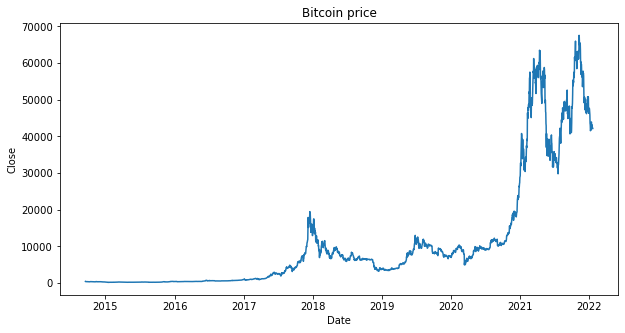

In [5]:
plt.figure(figsize=(10,5))
sns.lineplot(data.index, data.Close)
plt.title('Bitcoin price')

### Stationarity

In [7]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data.Close)
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])
# Data is not stationary

ADF Test Statistic: -1.10
5% Critical Value: -2.86
p-value: 0.72


In [8]:
from statsmodels.tsa.stattools import kpss

result = kpss(data.Close)
print(result)
print('KPSS Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[3]['5%'])
print('p-value: %.2f' % result[1])

(5.553257195214592, 0.01, 28, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS Test Statistic: 5.55
5% Critical Value: 0.46
p-value: 0.01


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


### Autocorrelation

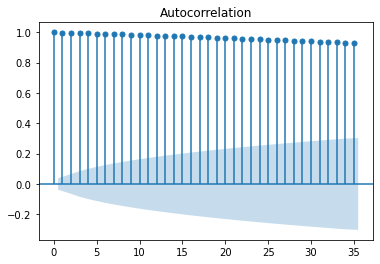

In [9]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
plot_acf(data.Close)
plt.show()

### Stationarizing

In [10]:
data['differ'] = data['Close'].diff()

In [11]:
data.head()

,Close,differ
Date,,
2014-09-17,457.334015,NaN
2014-09-18,424.440002,-32.894012
2014-09-19,394.795990,-29.644012
2014-09-20,408.903992,14.108002
2014-09-21,398.821014,-10.082977


Text(0.5, 1.0, 'Bitcoin price')

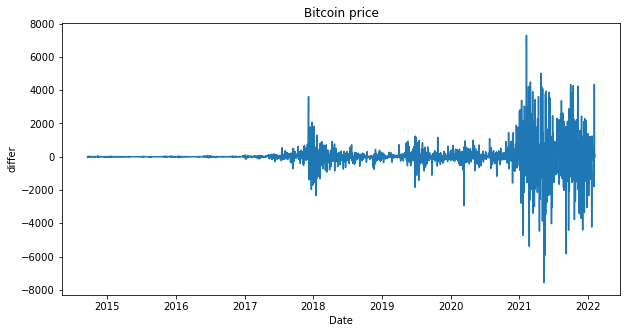

In [12]:
plt.figure(figsize=(10,5))
sns.lineplot(data.index, data.differ)
plt.title('Bitcoin price')

In [13]:
result = adfuller(data.differ.dropna())
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

ADF Test Statistic: -8.54
5% Critical Value: -2.86
p-value: 0.00


### Implementation of AR model

In [16]:
from statsmodels.tsa.arima_model import ARMA
ar1 = ARMA(data.differ.dropna(), order=(1, 0))
result1 = ar1.fit()
print(result1.summary())

                              ARMA Model Results                              
Dep. Variable:                 differ   No. Observations:                 2699
Model:                     ARMA(1, 0)   Log Likelihood              -21767.363
Method:                       css-mle   S.D. of innovations            769.726
Date:                Sun, 06 Feb 2022   AIC                          43540.727
Time:                        15:50:25   BIC                          43558.429
Sample:                    09-18-2014   HQIC                         43547.128
                         - 02-06-2022                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           15.2287     14.441      1.055      0.292     -13.075      43.532
ar.L1.differ    -0.0260      0.019     -1.351      0.177      -0.064       0.012
                                    Roots   

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [17]:
ar2 = ARMA(data.differ.dropna(), order=(10, 0))
resul2 = ar2.fit()
print(resul2.summary())

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                              ARMA Model Results                              
Dep. Variable:                 differ   No. Observations:                 2699
Model:                    ARMA(10, 0)   Log Likelihood              -21746.979
Method:                       css-mle   S.D. of innovations            763.918
Date:                Sun, 06 Feb 2022   AIC                          43517.959
Time:                        15:50:47   BIC                          43588.767
Sample:                    09-18-2014   HQIC                         43543.566
                         - 02-06-2022                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            15.2287     16.556      0.920      0.358     -17.221      47.679
ar.L1.differ     -0.0303      0.019     -1.576      0.115      -0.068       0.007
ar.L2.differ      0.0052      0.019     

### MA

In [18]:
ma1 = ARMA(data.differ.dropna(), order=(0, 1))
result_ma1 = ma1.fit()
print(result_ma1.summary())

                              ARMA Model Results                              
Dep. Variable:                 differ   No. Observations:                 2699
Model:                     ARMA(0, 1)   Log Likelihood              -21767.362
Method:                       css-mle   S.D. of innovations            769.726
Date:                Sun, 06 Feb 2022   AIC                          43540.725
Time:                        15:51:16   BIC                          43558.427
Sample:                    09-18-2014   HQIC                         43547.126
                         - 02-06-2022                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           15.2287     14.431      1.055      0.291     -13.055      43.513
ma.L1.differ    -0.0260      0.019     -1.353      0.176      -0.064       0.012
                                    Roots   

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [19]:
ma2 = ARMA(data.differ.dropna(), order=(0, 10))
result_ma2 = ma2.fit()
print(result_ma2.summary())

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                              ARMA Model Results                              
Dep. Variable:                 differ   No. Observations:                 2699
Model:                    ARMA(0, 10)   Log Likelihood              -21744.691
Method:                       css-mle   S.D. of innovations            763.265
Date:                Sun, 06 Feb 2022   AIC                          43513.382
Time:                        15:51:31   BIC                          43584.189
Sample:                    09-18-2014   HQIC                         43538.988
                         - 02-06-2022                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            15.2287     16.761      0.909      0.364     -17.622      48.079
ma.L1.differ     -0.0297      0.019     -1.548      0.122      -0.067       0.008
ma.L2.differ      0.0140      0.019     

### Models comparison

In [22]:
from sklearn.model_selection import train_test_split

x = data.drop(columns=["Close"])
y = data["Close"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

print(len(x_train))
print(len(x_test))

2160
540


In [23]:
x_test.head()

,differ
Date,
2019-11-05,-70.084961
2017-05-19,99.059937
2020-01-30,192.363281
2019-12-08,8.107422
2018-04-25,-851.759766


In [27]:
ar1 = ARMA(x_train.dropna(), order=(1, 0))
result_ar1 = ar1.fit()
print(result_ar1.summary())

                              ARMA Model Results                              
Dep. Variable:                 differ   No. Observations:                 2159
Model:                     ARMA(1, 0)   Log Likelihood              -17420.364
Method:                       css-mle   S.D. of innovations            772.615
Date:                Sun, 06 Feb 2022   AIC                          34846.729
Time:                        15:57:19   BIC                          34863.761
Sample:                             0   HQIC                         34852.958
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           20.8388     16.455      1.266      0.205     -11.413      53.091
ar.L1.differ    -0.0105      0.022     -0.487      0.626      -0.053       0.032
                                    Roots   

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
